In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [11]:
import datetime
house_data["Time"]=pd.to_datetime(house_data["Time"], format='%H:%M:%S')

In [12]:
day_time_data = house_data[house_data['Time'].dt.hour.isin(np.arange(6, 18))]

In [13]:
night_data = house_data[house_data['Time'].dt.hour.isin([i for i in range(0, 7)]+[i for i in range(18,24)])]

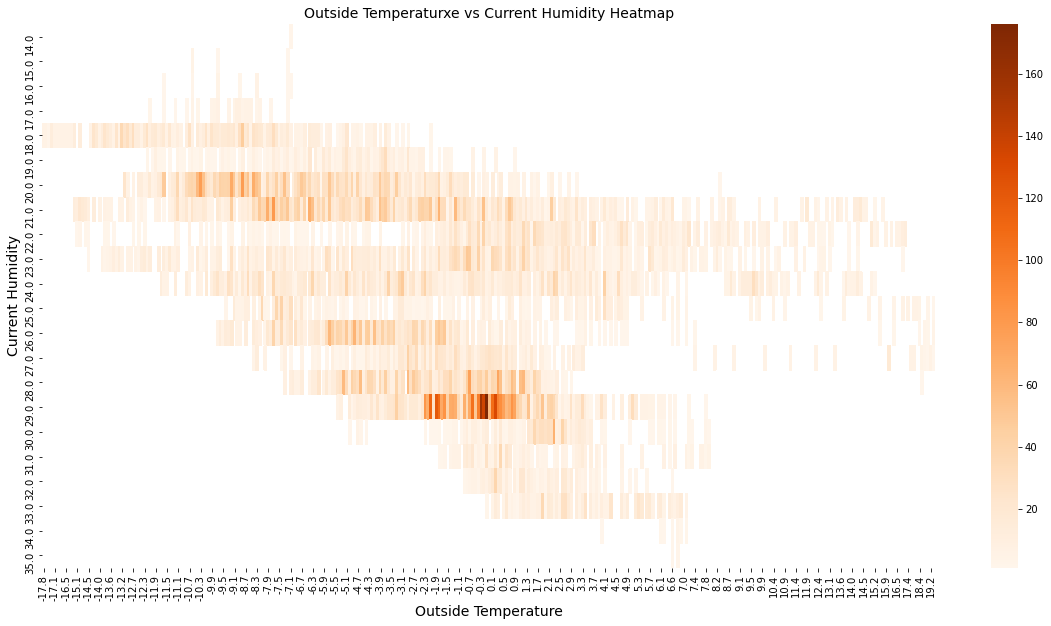

In [14]:
daily_activity_member = house_data.groupby(by = [ 'Current Humidity (%RH)','Outdoor Temp (C)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daily_activity_member, cmap = 'Oranges')

plt.title('Outside Temperaturxe vs Current Humidity Heatmap', fontsize = 14)
plt.ylabel('Current Humidity', fontsize = 14)
plt.xlabel('Outside Temperature', fontsize = 14)
plt.show()

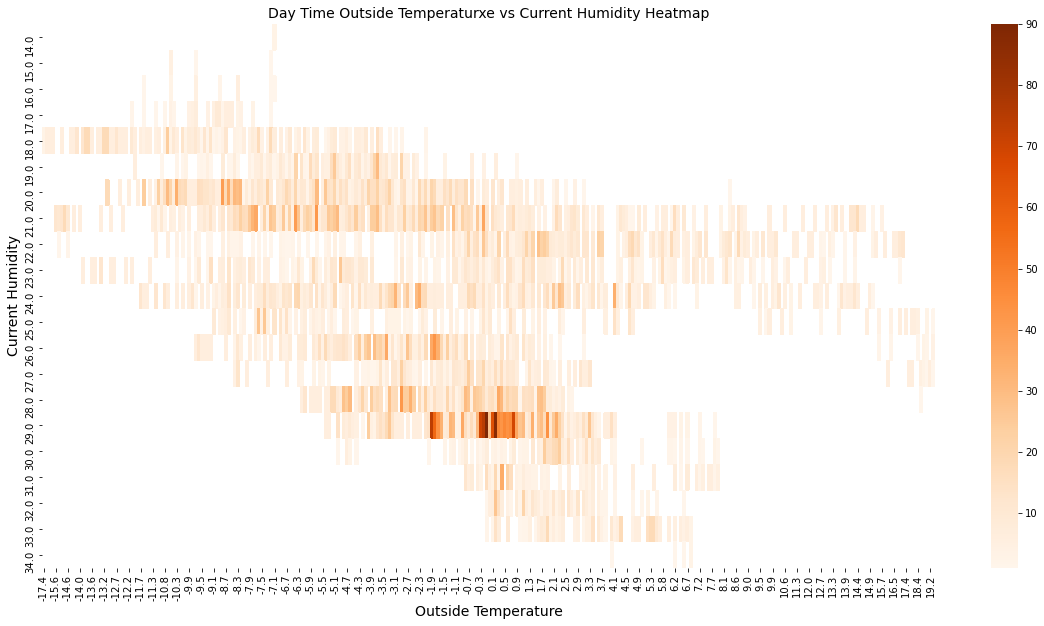

In [15]:
daytime_daily_activity_member = day_time_data.groupby(by = [ 'Current Humidity (%RH)','Outdoor Temp (C)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(daytime_daily_activity_member, cmap = 'Oranges')

plt.title('Day Time Outside Temperaturxe vs Current Humidity Heatmap', fontsize = 14)
plt.ylabel('Current Humidity', fontsize = 14)
plt.xlabel('Outside Temperature', fontsize = 14)
plt.show()

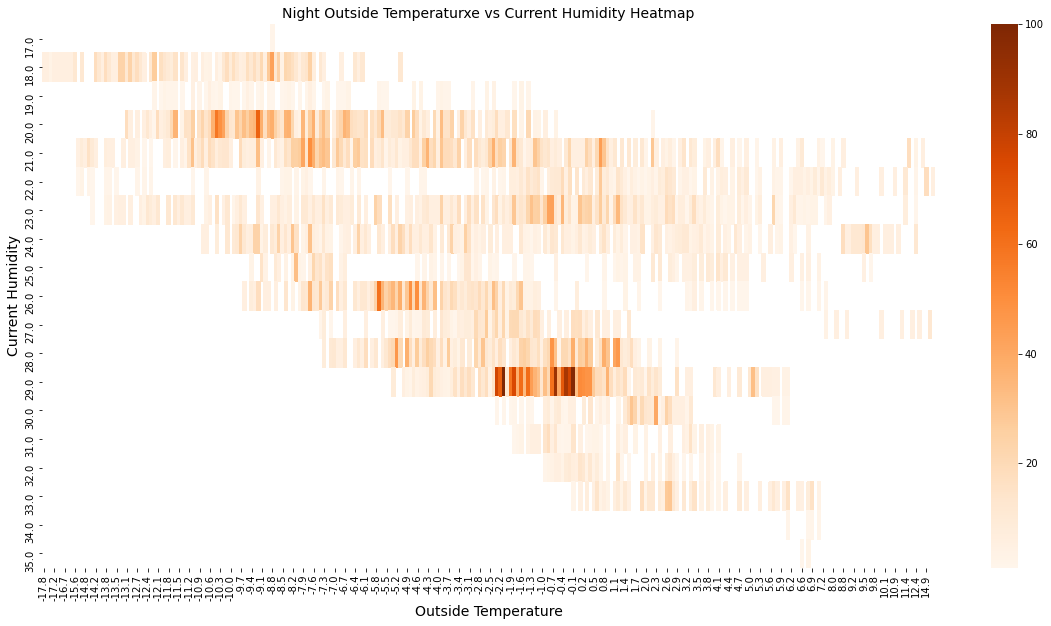

In [16]:
night_daily_activity_member = night_data.groupby(by = [ 'Current Humidity (%RH)','Outdoor Temp (C)']).count()['Heat Stage 1 (sec)'].unstack()

plt.figure(figsize = (20, 10))

sns.heatmap(night_daily_activity_member, cmap = 'Oranges')

plt.title('Night Outside Temperaturxe vs Current Humidity Heatmap', fontsize = 14)
plt.ylabel('Current Humidity', fontsize = 14)
plt.xlabel('Outside Temperature', fontsize = 14)
plt.show()